# Keras Question 2

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow import keras

## Load MNIST dataset

In [ ]:
# Model / data parameters
NUM_ROWS = 28
NUM_COLS = 28
num_classes = 10

# LOAD the MNIST data from Keras, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') /255

# Reshape data
x_train = x_train.reshape(x_train.shape[0], NUM_ROWS* NUM_COLS* 1)
x_test = x_test.reshape(x_test.shape[0], NUM_ROWS* NUM_COLS* 1)

# Categorically encode labels
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Have first 10000 images as a validatin data and leave the rest as training
x_validate = x_train[:10000]
y_validate = y_train[:10000]
x_train = x_train[10000:]
y_train = y_train[10000:]

# Make sure the data sizees match your output
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)
print("x_validate shape:", x_validate.shape)
print("y_validate shape:", x_validate.shape)


x_train shape: (50000, 784)
y_train shape: (50000, 10)
x_test shape: (10000, 784)
y_test shape: (10000, 10)
x_validate shape: (10000, 784)
y_validate shape: (10000, 784)


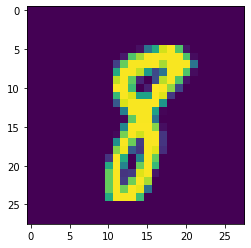

In [ ]:
# Plot an image like below from the Training size
plt.imshow(x_train[1881].reshape(28, 28))

## Build and train a Sequential Model

In [ ]:
# load necessary Keras modules for building a sequantial model
from tensorflow.keras.models import Sequential
from keras import activations
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [ ]:
# Build the model first
model = keras.Sequential()
model.add(Dense(units=25, input_shape=(784,), activation='relu'))
model.add(Dense(units=25, activation='relu'))
model.add(Dense(units=num_classes, activation='softmax'))


In [ ]:
# Configure the model with a categorical_crossentropy and stochastic gradient descent optimizer and observe 
# metrics as accuracy
model.compile(loss='categorical_crossentropy',optimizer="sgd", metrics=['accuracy'])


In [ ]:
#Make sure the following command generates the same output like below in your code
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 25)                19625     
                                                                 
 dense_12 (Dense)            (None, 25)                650       
                                                                 
 dense_13 (Dense)            (None, 10)                260       
                                                                 
Total params: 20,535
Trainable params: 20,535
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train your model with training and validatin datasets and have only 1 epoch with a batch size of 32
model.fit(x_train, y_train,validation_data = (x_validate,y_validate), epochs=1, batch_size=32)


1563/1563 [==============================] - 5s 3ms/step - loss: 0.8905 - accuracy: 0.7479 - val_loss: 0.4193 - val_accuracy: 0.8854


In [ ]:
# Test your NN 
finalTestScore = model.evaluate(x_test, y_test, batch_size=1)
print('Test loss:', finalTestScore[0])
print('Test accuracy:', finalTestScore[1])

10000/10000 [==============================] - 23s 2ms/step - loss: 0.4049 - accuracy: 0.8861
Test loss: 0.4048811197280884
Test accuracy: 0.8860999941825867




```
# This is formatted as code
```

## Plot losses with a third party library which will help you generate interactive performance metrics. Make sure you have the call back function invoked with variable PlotLossesCallback below 

Using the package https://github.com/stared/livelossplot

Install using the command `pip install livelossplot`

In [ ]:
!pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!ls

sample_data


In [ ]:
from livelossplot.keras import PlotLossesCallback

In [ ]:
# Configure again the same model with a categorical_crossentropy and stochastic gradient descent optimizer and observe 
# metrics as accuracy
model.compile(loss='categorical_crossentropy',optimizer="sgd", metrics=['accuracy'])


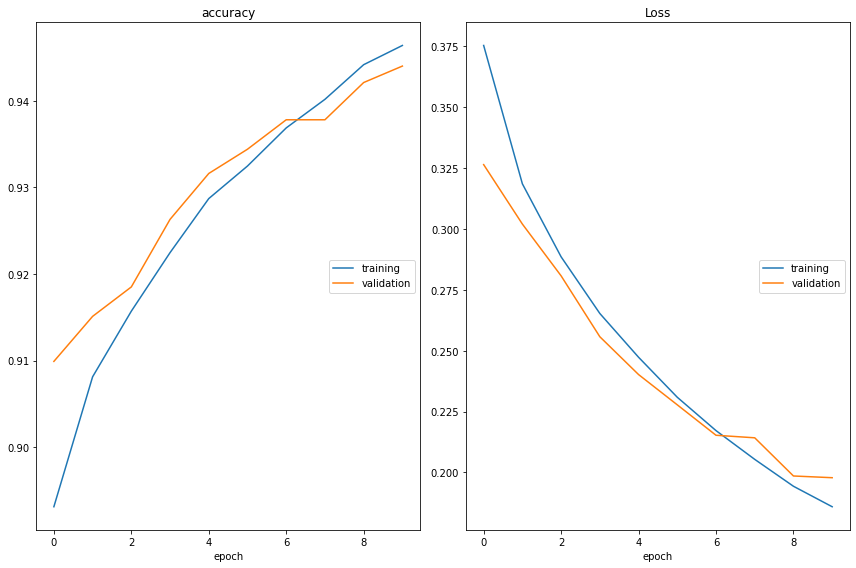

accuracy
	training         	 (min:    0.893, max:    0.946, cur:    0.946)
	validation       	 (min:    0.910, max:    0.944, cur:    0.944)
Loss
	training         	 (min:    0.186, max:    0.375, cur:    0.186)
	validation       	 (min:    0.198, max:    0.326, cur:    0.198)
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1859 - accuracy: 0.9464 - val_loss: 0.1978 - val_accuracy: 0.9440


In [ ]:
# This time make sure you train and validate your network with epoch size of 10 and batch_size of 32 and 
model.fit(x_train, y_train,
          batch_size=32,
          epochs=10,
          callbacks=[PlotLossesCallback()],
          validation_data=(x_validate, y_validate))
# Make sure you are able to generate the similar plots  given below 

In [ ]:
# Test the NN with the test data, 
finalTestScore = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', finalTestScore[0])
print('Test accuracy:', finalTestScore[1])

Test loss: 0.1874421089887619
Test accuracy: 0.9452000260353088


## Convolutional Neural Network for MNIST

In [ ]:
#Load the necessary modules from Keras that will be used in CNN training
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [ ]:
# Build your model according to details given in the World document
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
# Compile the network wtih categorical_crossentropy, sgd optimizer and accuracy metrics
model.compile(loss="categorical_crossentropy", optimizer = "sgd", metrics =["accuracy"])

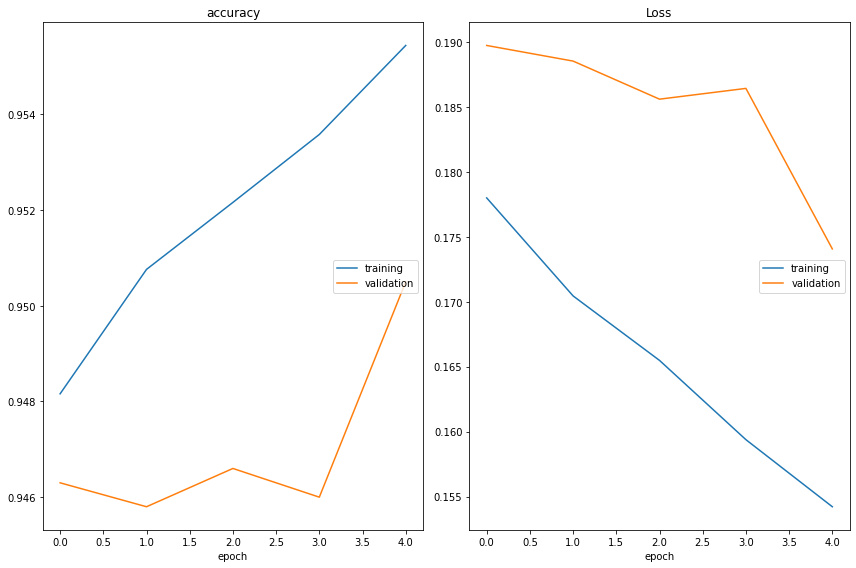

accuracy
	training         	 (min:    0.948, max:    0.955, cur:    0.955)
	validation       	 (min:    0.946, max:    0.951, cur:    0.951)
Loss
	training         	 (min:    0.154, max:    0.178, cur:    0.154)
	validation       	 (min:    0.174, max:    0.190, cur:    0.174)
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1542 - accuracy: 0.9554 - val_loss: 0.1741 - val_accuracy: 0.9505


In [ ]:
# Train the network with both training and validation data with epoch size of 5 and batch size of 32
# Make sure you can generate the plots
x_train = x_train.reshape(x_train.shape[0], NUM_ROWS* NUM_COLS* 1)
x_test = x_test.reshape(x_test.shape[0], NUM_ROWS* NUM_COLS* 1)

model.fit(x_train, y_train, batch_size=32, epochs=5,callbacks=[PlotLossesCallback()], validation_data=(x_validate, y_validate))
